In [1]:
# python -m pip install -U langchain-google-genai

In [3]:
import os
from dotenv import load_dotenv,find_dotenv

load_dotenv(find_dotenv())
_ = os.getenv('GOOGLE_API_KEY')
          
# credential_path = find_dotenv()
# os.environ['GOOGLE_API_KEY'] = credential_path

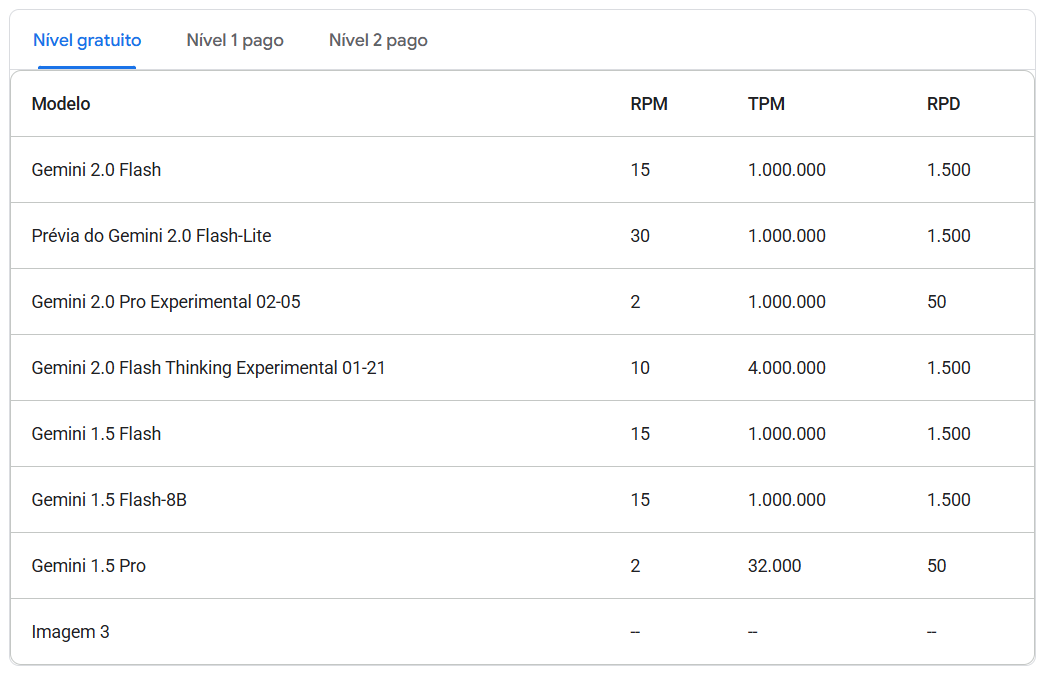

In [4]:
from langchain.chat_models import init_chat_model
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory
from langchain.prompts import PromptTemplate

from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph


=============================== Chatbot com Histórico ====================================

In [5]:
# Define the LLM model
model = init_chat_model("gemini-2.0-flash-lite", model_provider="google_genai")

# Define a new graph
workflow = StateGraph(state_schema=MessagesState)

# Define the function that calls the model
def call_model(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": response}

# Define the (single) node in the graph
workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

# Add memory
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

In [6]:
config = {"configurable": {"thread_id": "abc123"}}

In [ ]:
query = "Se eu falar em português voce entende?"

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].content  # output contains all messages in state

================================== Ai Message ==================================

Sim, eu entendo português! Pode falar comigo em português. 😊


In [11]:
output["messages"]

[HumanMessage(content="Hi! I'm Bob.", additional_kwargs={}, response_metadata={}, id='3fbd093d-4053-4433-a703-c73c69b91f37'),
 AIMessage(content="Hi Bob! It's nice to meet you. How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-4406761d-d2f2-4261-a786-2498f8642974-0', usage_metadata={'input_tokens': 7, 'output_tokens': 19, 'total_tokens': 26, 'input_token_details': {'cache_read': 0}}),
 HumanMessage(content='Se eu falar em portugues voce entende?', additional_kwargs={}, response_metadata={}, id='986a713c-e0e2-460d-a079-16391c3e4991'),
 AIMessage(content='Sim, eu entendo português! Pode falar comigo em português. 😊', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-0a5ac56d-72dc-4844-8a9b-716cc0cc7e91-0', usage_metadata={'input_tokens': 34, 'out

===================================== Até aqui tudo funciona ============================================

to do: descobrir como eu adiciono o template nessa chain

In [3]:
template = """Eu direi um nome e você irá me responder com a seguinte frase:
{prompt} é meu amigo."""

CHAIN_PROMPT = PromptTemplate(input_variables=["prompt"],template=template,)

In [ ]:
llm = ChatGoogleGenerativeAI(model=model, temperature=0)
memory = ConversationBufferMemory()
conversation = ConversationChain(
    llm=llm, 
    prompt=CHAIN_PROMPT,
    memory = memory
    )

ValidationError: 1 validation error for ConversationChain
  Value error, Got unexpected prompt input variables. The prompt expects ['prompt'], but got ['history'] as inputs from memory, and input as the normal input key. [type=value_error, input_value={'llm': ChatGoogleGenerat...=[])), 'verbose': False}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/value_error

In [ ]:
prompt= "Otávio"

In [ ]:
conversation.invoke(input=prompt)

In [ ]:
# AIMessage = llm.invoke("Seguindo os exemplos: [Tranquilo como um esquilo] [Suave na nave] [De boa na lagoa] faça uma frase que comece com [Fechado]")

In [11]:
AIMessage.content

'[Fechado com chave de ouro]'